# Heatmap Example

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datafile = "./matrix/data.txt"
num_rows_to_read_each_frame = 20
# WMJ column_names = ["x01", "x02", "x03", "x04", "x05", "x06", "x07", "x08", "x09", "x10"]

In [3]:
rows_read_so_far = 0
current_frame = 1

df = pd.DataFrame()
# WMJ df = pd.DataFrame(columns = column_names)

while True:
    try:
        df_cur = pd.read_csv(datafile, 
                             sep = "\t", 
                             nrows = num_rows_to_read_each_frame, 
                             skip_blank_lines = True,
                             skiprows = rows_read_so_far,
                             # WMJ names = column_names,
                             header = None, 
                             index_col = False,
                            )
        # there's a column with NaNs (there's a trailing tab) in the
        # datafile, so let's just drop any columns with garbage data
        # and that'll fix any problems we have

        df_cur = df_cur.dropna(axis='columns')
        df_cur['frame_number'] = current_frame

        current_frame = current_frame + 1
        rows_read_so_far = rows_read_so_far + num_rows_to_read_each_frame + 1

        if(len(df_cur.index) == 0):
            print("DONE!")
            break
        
        #display(df_cur)
        
        df = df.append(df_cur, ignore_index = True)

    except:
        print("HOLY SH*T EXCEPTION!")
        break

HOLY SH*T EXCEPTION!


Let's tale a brief look at the data.

In [4]:
df.head(14)

0    1    2    3    4    5    6    7    8    9  frame_number
0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0             1
1   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0             1
2   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0             1
3   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0             1
4   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0             1
5   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0             1
6   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0             1
7   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0             1
8   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0             1
9   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0             1
10  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0             1
11  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0             1
12  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0             1
13  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0             1

In [5]:
print("There are %d rows." % len(df.index))

There are 420 rows.


In [6]:
print("There are %d frames of data, each %d rows long." % (max(df.frame_number), num_rows_to_read_each_frame))

There are 21 frames of data, each 20 rows long.


In [7]:
print("This should equal the total number of rows (from above) %d * %d = %d" % (max(df.frame_number), \
    num_rows_to_read_each_frame, max(df.frame_number) * num_rows_to_read_each_frame))

This should equal the total number of rows (from above) 21 * 20 = 420


## Heatmap using Seaborn
Seaborn heatmap documentation of the API can be found here: https://seaborn.pydata.org/generated/seaborn.heatmap.html

One can find there lots of cool options

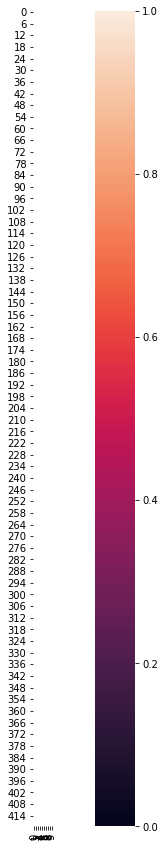

In [8]:
figwidth = 15
figheight = 15
lw = 0.75 # linewidth between cells in the heatmap, set to 0 if you want no gaps

df_plot = df.drop(columns = ["frame_number"])

fig, ax = plt.subplots(figsize=(figwidth, figheight))
sns.heatmap(df_plot, linewidths = lw, square = True);

# Plotly
Or, we can use plotly . . .

In [9]:
import plotly.express as px
import plotly.graph_objects as go

Here's a simple example - not using our data . . .

In [10]:
fig = px.imshow([[1, 20, 30],
                 [20, 1, 60],
                 [30, 60, 1]])
fig.show()

In [11]:
# our plotting dataframe won't include the frame number
# let's look at the entire thing as one giant heatmap
df_plot = df.drop(columns = ["frame_number"])

go.Figure(data = [go.Heatmap(
    z = df_plot.values,
    x = df_plot.columns,
    y = df_plot.index,
    colorscale = 'Bluered_r',
)],
    layout=go.Layout(
            title = 'Blah blah a title',
            xaxis=dict(
                showgrid=False,
                zeroline=False,
                showline=False,
            ),
            yaxis=dict(
                showgrid=False,
                zeroline=False,
                showline=False,
            ),
            autosize=True,
            height=550,
            hovermode='closest',
            #margin=go.Margin(l=150, r=0, t=50),
        )
         )

In [12]:
# Create figure
fig = go.Figure()

max_frame = int(max(df.frame_number))

# Add traces, one for each slider step
#for step in np.arange(0, 5, 0.1):
for step in range(1, max_frame + 1):
    print("Building frame %d . . ." % step)
    df_subset = df[df['frame_number'] == step]
    df_subset = df_subset.drop(columns = ["frame_number"])

    df_subset.reset_index(drop = True, inplace = True)
    # WMJ display(df_subset)
    fig.add_trace(
        go.Heatmap(
            z = df_subset.values,
            x = df_subset.columns,
            y = df_subset.index,
            colorscale = 'Bluered'
        )
    )

# Make 0th trace visible
fig.data[0].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="restyle",
        args=["visible", [False] * len(fig.data)],
    )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

Building frame 1 . . .
Building frame 2 . . .
Building frame 3 . . .
Building frame 4 . . .
Building frame 5 . . .
Building frame 6 . . .
Building frame 7 . . .
Building frame 8 . . .
Building frame 9 . . .
Building frame 10 . . .
Building frame 11 . . .
Building frame 12 . . .
Building frame 13 . . .
Building frame 14 . . .
Building frame 15 . . .
Building frame 16 . . .
Building frame 17 . . .
Building frame 18 . . .
Building frame 19 . . .
Building frame 20 . . .
Building frame 21 . . .
